Gaussian Mixure Model with Expectation-Maximization Algorithm

$$ \theta = (\pi, \mu_{1}, \sigma_{1}, \mu_2, \sigma_{2}) $$

when $\mu_1 != \mu_2$ && $\sigma_1 == \sigma_2$

In [37]:
fit.twonorm <- function(y, par, max_iter, var.equal=FALSE, trace=FALSE)
{
  # initialization
  loglik <- c();
  aic <- c(); bic <- c()
  res = c()
  par_trace=c(par)

  for (k in 1:max_iter) {
    # E step
    d1 = par[1]*dnorm(y, par[2], par[3])
    d2 = (1-par[1])*dnorm(y, par[4], par[5])
    h1 = d1/(d1+d2)
    h2 = 1-h1
    #responsibility trace
    res = rbind(res, h2)
    # M step
    par[1] = mean(h1)
    par[2] = sum(h1*y)/sum(h1)
    par[3] = sqrt(sum(h1*(y^2))/sum(h1) - (par[2])^2)
    par[4] = sum(h2*y)/sum(h2)      
    par[5] = sqrt(sum(h2*(y^2))/sum(h2) - (par[4])^2)

    par_trace = rbind(par_trace, par)      
    if(sum(abs(1-(par_trace[k]/par_trace[k+1]))) < 0.0000000001) break   

    like = par[1]*dnorm(y,par[2],par[3]) + (1-par[1])*dnorm(y,par[4],par[5])
    loglik = rbind(loglik, log(like))

    aic = c(aic, -2*sum(log(like)) + 2*length(par)) #Akaike information criterion
    bic = c(bic, -2*sum(log(like)) + length(par)*log(length(y)))
  }
  if (trace){out = list(parameters=c(par), loglik=loglik, params=par_trace, AIC=aic, BIC=bic, iterations = k)}
  else{out <- list(parameters=c(par), iterations= k)}
  out
}

Statistical inference creterion
- AIC : [Akaike information criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion)
- BIC : [Bayesian information criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

Initiate the value

In [38]:
y = c(-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
+        0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22)

initial_values = c(0.5, 1, sqrt(var(y)), 6, sqrt(var(y)))

In [39]:
print(initial_values)

[1] 0.500000 1.000000 2.043674 6.000000 2.043674


In [40]:
fit.twonorm(y, par=initial_values, max_iter=200, var.equal=FALSE, trace=FALSE)

$parameters
[1] 0.5545902 1.0831618 0.9007611 4.6559128 0.9048721

$iterations
[1] 52

### Histogram of y

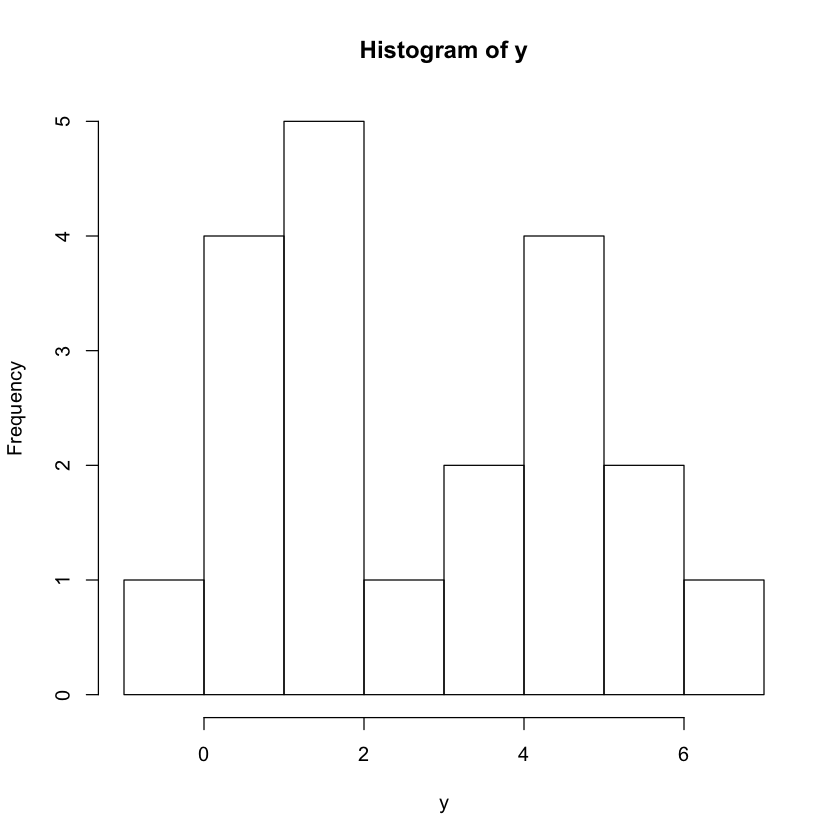

In [4]:
hist(y)

In [41]:
result = fit.twonorm(y, par=initial_values, max_iter=200, var.equal=FALSE, trace=TRUE)$parameters
print(result)

[1] 0.5545902 1.0831618 0.9007611 4.6559128 0.9048721


In [42]:
my_theory = list(p=c(res[1], 1-res[1]), mu = c(res[2],res[4]), sigma=c(res[3], res[5]))

### Compare my result with R package

R: mixtool pakage, Tools for Analyzing Finite Mixture Models [this](https://cran.r-project.org/web/packages/mixtools/mixtools.pdf)

In [43]:
!install.packages("mixtools")

also installing the dependencies ‘lattice’, ‘Matrix’, ‘MASS’, ‘segmented’, ‘survival’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in !install.packages("mixtools"): 잘못된 인자의 유형입니다


In [7]:
library(mixtools)

ERROR: Error in library(mixtools): there is no package called ‘mixtools’


In [8]:
normalmixEM(y)

ERROR: Error in eval(expr, envir, enclos): 함수 "normalmixEM"를 찾을 수 없습니다


In [18]:
res_R = normalmixEM(y)
list(p = res_R$lambda, mu=res_R$mu, sigma=res_R$sigma)

number of iterations= 16 


$p
[1] 0.5545942 0.4454058

$mu
[1] 1.083179 4.655932

$sigma
[1] 0.9007732 0.9048597

In [19]:
my_theory

$p
[1] 0.5546002 0.4453998

$mu
[1] 1.083195 4.655951

$sigma
[1] 0.9007913 0.9048411

## Plot

### Draw hist and theoretical curve

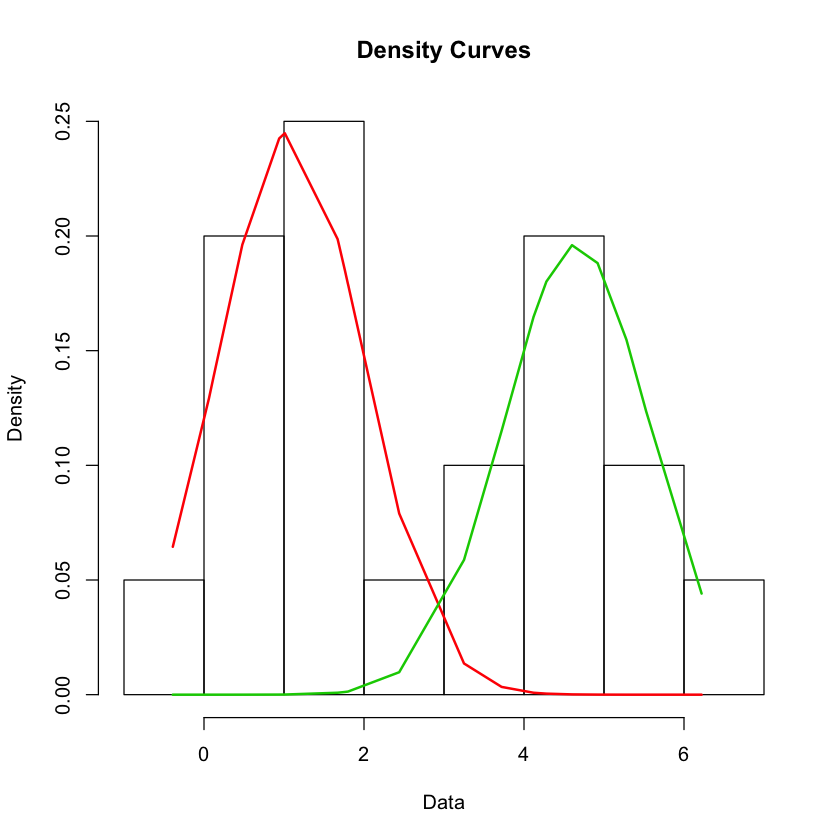

In [20]:
plot(res_R, which=2)

### Plot responsibility, ecdf. Plot estimates and loglik at each iteration.

## 1. responsibility

## 2. ecdf

## Using the embeded ecdf() and plot() functions

In [21]:
my.ecdf = ecdf(y); my.ecdf

Empirical CDF 
Call: ecdf(y)
 x[1:20] =  -0.39,   0.06,   0.12,  ...,   5.53,   6.22

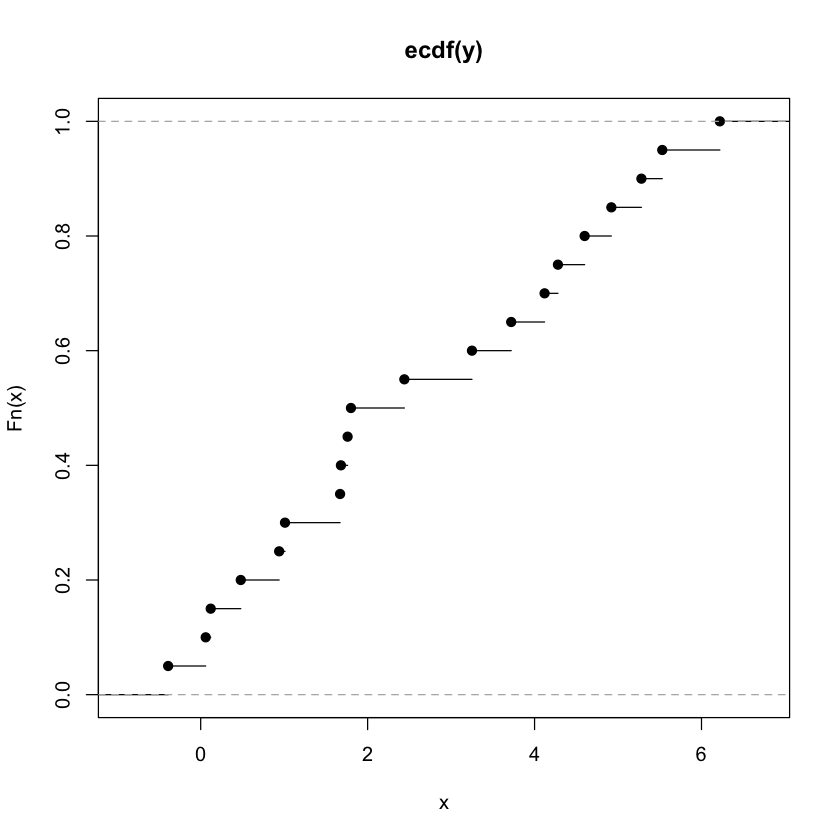

In [22]:
plot(my.ecdf)

In [23]:
res = fit.twonorm(y, par=initial_values, max_iter=200, var.equal=FALSE, trace=TRUE)

In [24]:
my.ordered = sort(y); my.ordered

[1] -0.39  0.06  0.12  0.48  0.94  1.01  1.67  1.68  1.76  1.80  2.44  3.25
[13]  3.72  4.12  4.28  4.60  4.92  5.28  5.53  6.22

## Plot estimates and loglik at each iteration.

### If i decide convergency by parameter, it takes too much time
### But if i decide the value by log-likelihood, that fuction get out the loop so fast...

In [25]:
nrow(res$loglik)

[1] 23

In [26]:
plot(x=1:res$iterations, y=rowSums(res$loglik))

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


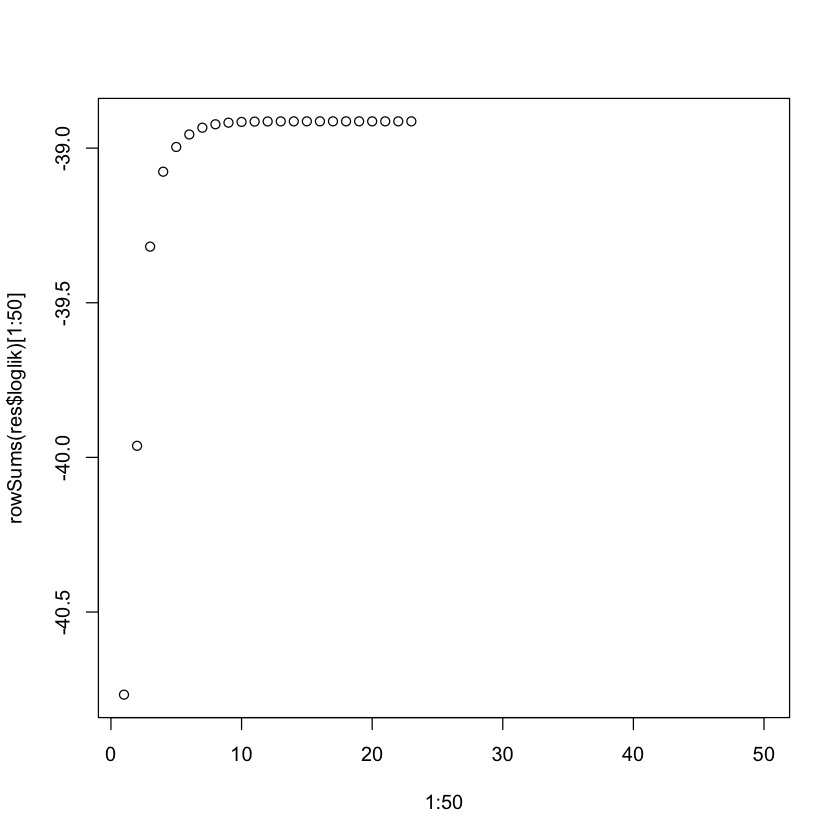

In [27]:
plot(x= 1:50, y=rowSums(res$loglik)[1:50])

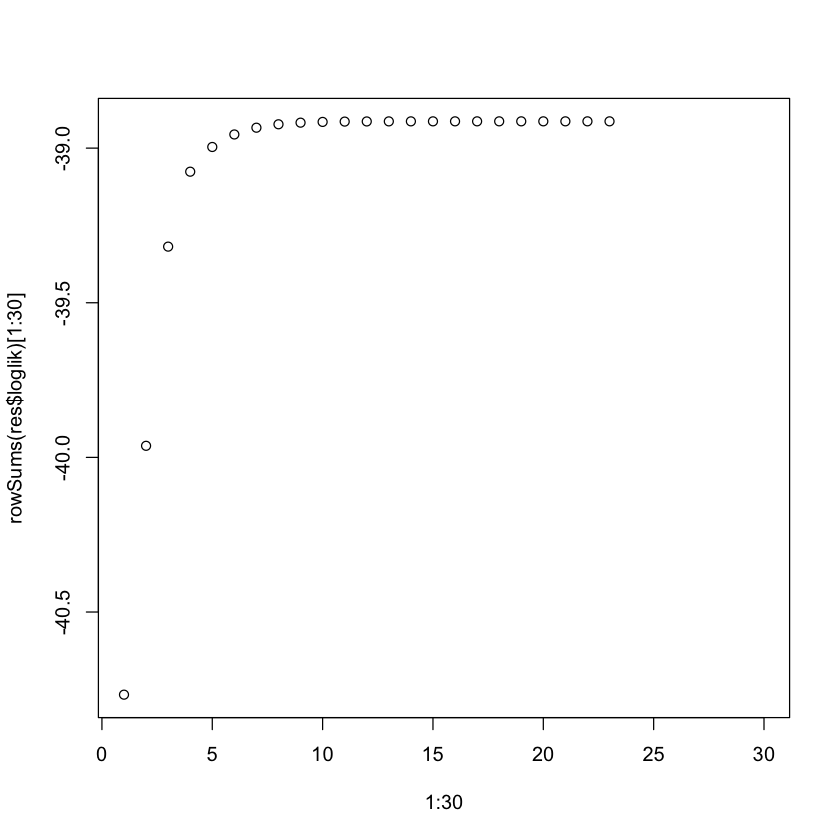

In [28]:
plot(x= 1:30, y=rowSums(res$loglik)[1:30])

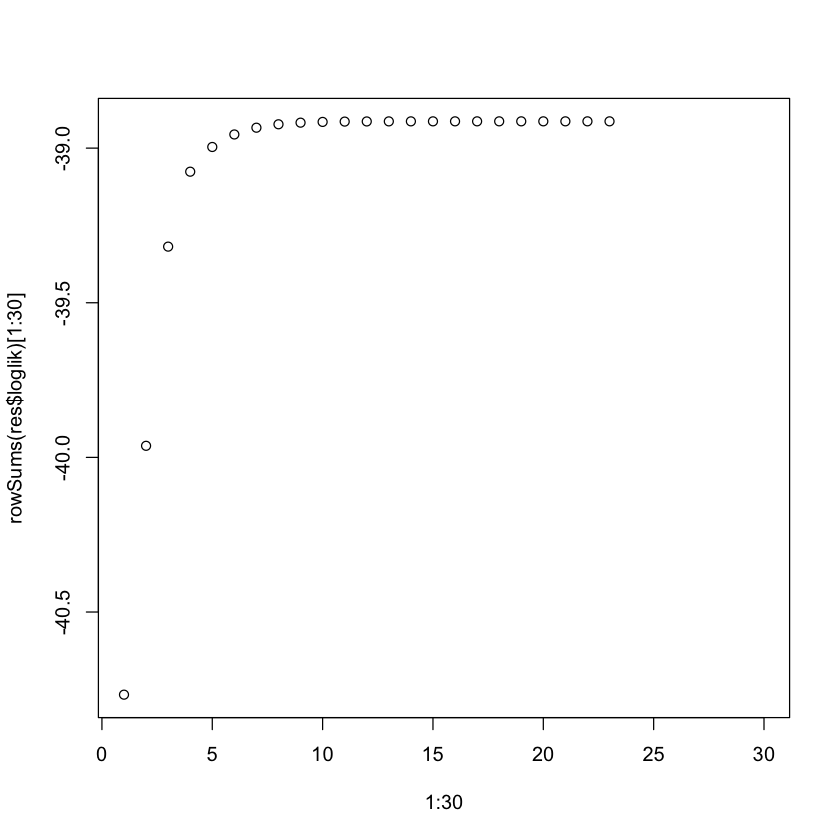

In [29]:
plot(x= 1:30, y=rowSums(res$loglik)[1:30])

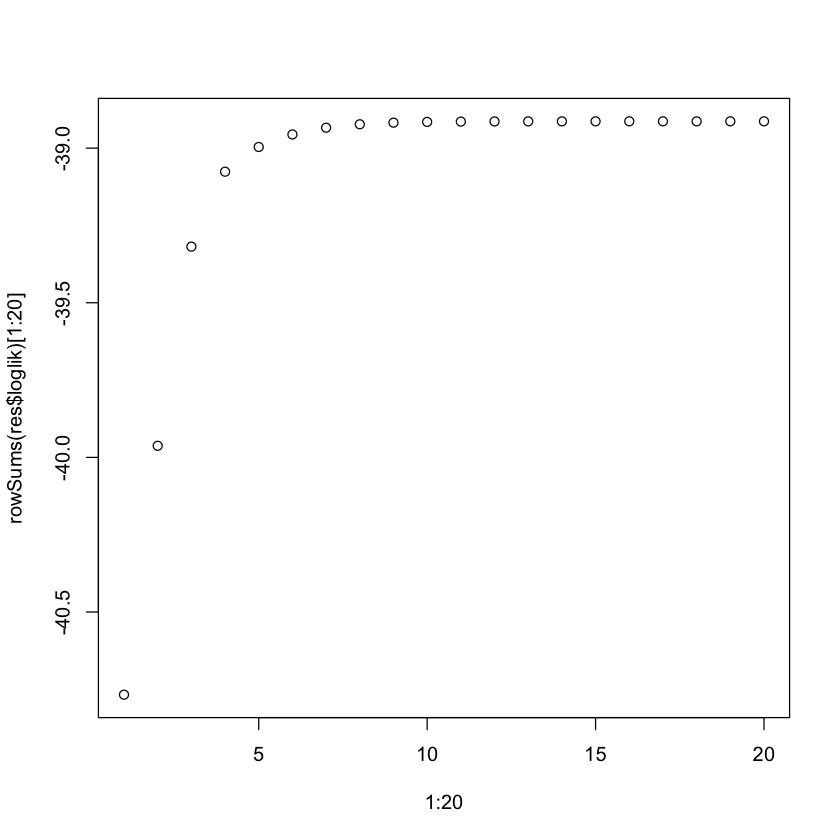

In [30]:
plot(x= 1:20, y=rowSums(res$loglik)[1:20])

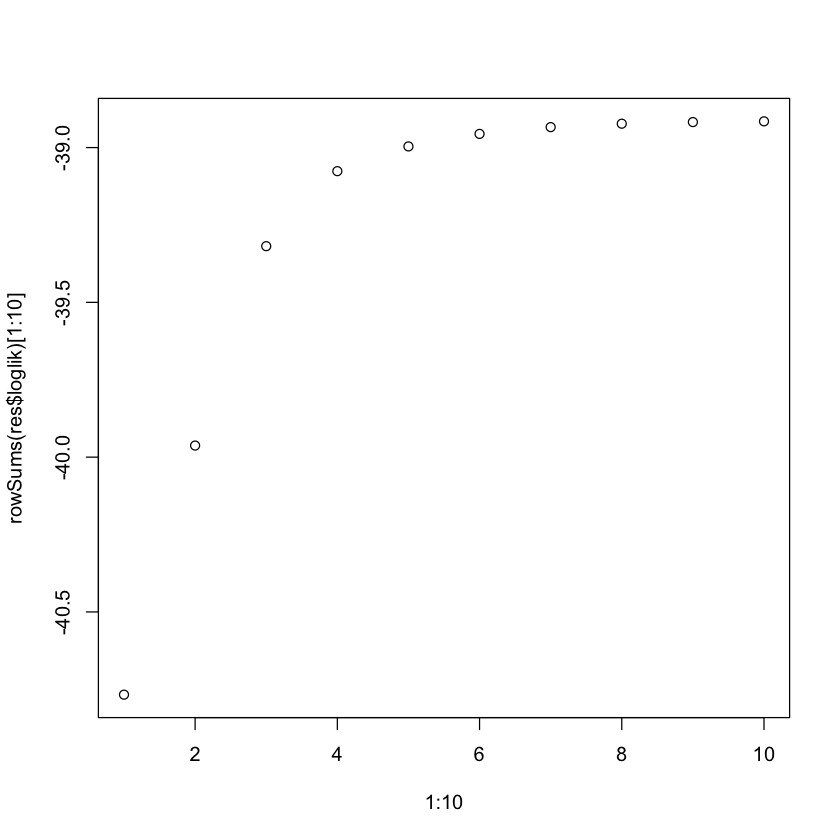

In [31]:
plot(x= 1:10, y=rowSums(res$loglik)[1:10])